# Top 10 Hottest Peppers in the World

How hot are the world's hottest peppers? How do they compare to those commonly used in cooking?

The Scoville Heat Unit (SHU) measures the spiciness of chili peppers. Originally, this involved diluting a pepper's alcohol-based extract in water until a panel of tasters could no longer detect the heat. The needed dilution determined the SHU. For example, if a pepper extract needed to be diluted 1,000 times before the heat was undetectable, it would be rated at 1,000 SHU.

Today, more accurate chemical methods determine SHU, but results are still expressed in Scoville Units.

The file `worlds-hottest-peppers.csv` lists the heat levels of the top 10 hottest peppers.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('worlds-hottest-peppers.csv')
df

,pepper,scoville_heat_unit
0,Pepper X,2693000
1,Carolina Reaper,2200000
2,Trinidad Moruga Scorpion,2009231
3,7 Pot Douglah,1853936
4,7 Pot Primo,1469000
5,Trinidad Scorpion,1463700
6,Naga Viper,1349000
7,Ghost Pepper,1041427
8,7 Pot Barrackpore,1000000
9,Red Savina Habanero,500000


Horizontal bar plot (pepper, scoville)

Text(0.5, 0, 'Scoville hit unit')

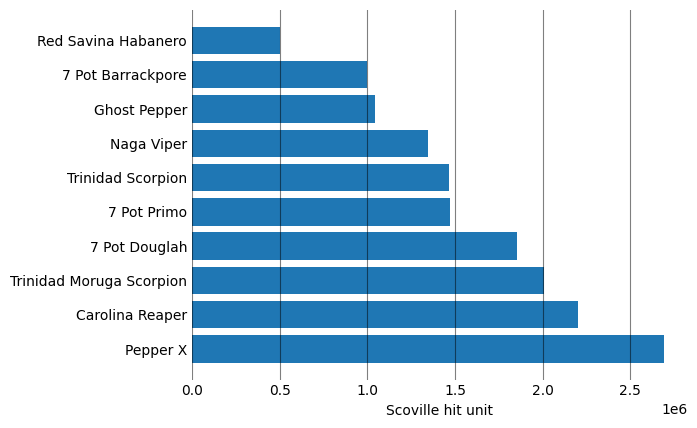

In [2]:
plt.barh(df['pepper'], df['scoville_heat_unit'])

# Set up pro tips : remove ticks and border lines
ax = plt.gca()
ax.tick_params(axis='both', length=0)
border = ['bottom', 'top', 'left', 'right']
ax.spines[border].set_visible(False)
# Set markers
ax.grid(axis='x', color='black', alpha=0.5)
# x-label
ax.set_xlabel('Scoville hit unit')

Put gradient color for pepper, according to the scoville hit unit

<BarContainer object of 10 artists>

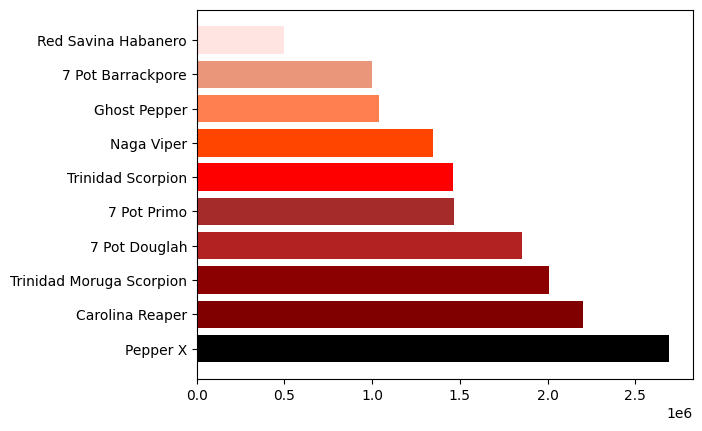

In [3]:
colors = ['black', 'maroon', 'darkred', 'firebrick', 'brown', 'red', 'orangered', 'coral', 'darksalmon', 'mistyrose']
peppers = df['pepper'].unique()
color_peppers = {}

# Dictionnary to assign colors to peppers
for color, pepper in zip(colors, peppers):
    color_peppers[pepper] = color

df2 = pd.DataFrame.from_dict(color_peppers, orient='index').reset_index()
df2.columns = ['peppers', 'colors']
# Add scoville
df2['scoville'] = df['scoville_heat_unit']

# Plot
plt.barh(df2['peppers'], df2['scoville'], color=df2['colors'])

- Compare the world's hottest peppers to common cooking varieties. For example, Jalapeños range from 2,500 to 8,000 Scoville units.

Text(0.5, 0, 'Scoville hit unit')

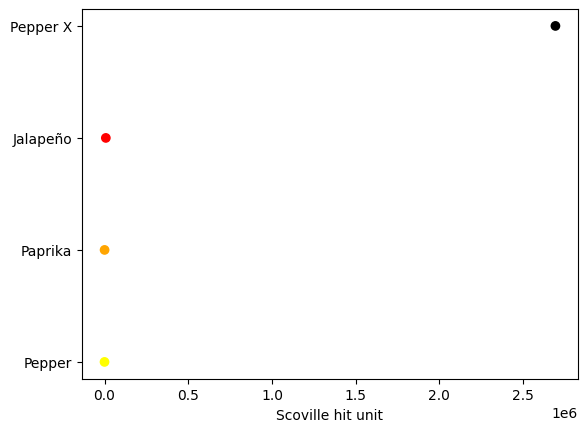

In [4]:
# Creation of the DataFrame
comparison = pd.DataFrame()

# Add the hottest pepper
hottest = df2.query('peppers == "Pepper X"')
comparison['ingredient'] = hottest['peppers']
comparison['scoville'] = hottest['scoville']
comparison['color'] = 'black'

# Add other ingredients : pepper (100), paprika (500), jalapeño (8000)
comparison.loc[len(comparison)] = ["Pepper", 100, 'yellow']
comparison.loc[len(comparison)] = ["Paprika", 500, 'orange']
comparison.loc[len(comparison)] = ["Jalapeño", 8000, 'red']
comparison = comparison.sort_values('scoville')

# Plot
plt.scatter(comparison['scoville'], comparison['ingredient'], c=comparison['color'])
plt.xlabel('Scoville hit unit')

- Highlight the rapid development of hotter peppers; for instance, the Ghost Pepper held the record in 2007, but has since been surpassed.

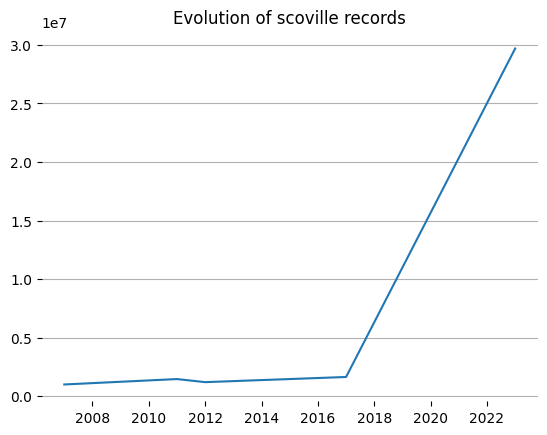

In [9]:
# Create new dataframe with name, scoville, date of the record
d = {'peppers': ['Pepper X', 'Carolina Reaper', 'Trinidad Scorpion Butch', 'Trinidad Moruga scorpion', 'Ghost'], 
        'scoville': [29693000, 1641183, 1463700, 1200000, 1001000],
        'record_date': [2023, 2017, 2011, 2012, 2007]
    }

evolution_record = pd.DataFrame(data=d)
evolution_record = evolution_record.sort_values('record_date')

# Plot
plt.plot(evolution_record['record_date'], evolution_record['scoville'])
plt.title('Evolution of scoville records')
ax = plt.gca()
ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
ax.grid(axis='y', visible=True)